In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import folium

In [2]:
data_path='../data'
sns.set(rc={'figure.figsize':(20,6)})

In [3]:
df=pd.read_csv(os.path.join(data_path,'cleaned_data.csv'))
df.head(2)

,event_id,event_date,year,event_type,sub_event_type,actor1,actor2,inter2,civilian_targeting,region,district,location,latitude,longitude,source,fatalities,population
0,156190,12 April 2024,2024,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,0,No,Kherson,Khersonskyi,Antonivka,46.6799,32.6925,Unian,0,11352.0
1,156193,12 April 2024,2024,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,0,No,Zaporizhia,Polohivskyi,Bilohiria,47.5268,36.0004,Ministry of Defence of Ukraine,0,282.0


In [4]:
print(df['sub_event_type'].unique())
counts = df['sub_event_type'].value_counts()
print(counts)

['Shelling/artillery/missile attack' 'Air/drone strike'
 'Remote explosive/landmine/IED' 'Abduction/forced disappearance' 'Attack'
 'Grenade' 'Sexual violence' 'Suicide bomb' 'Mob violence'
 'Violent demonstration']
sub_event_type
Shelling/artillery/missile attack    63913
Air/drone strike                     11235
Remote explosive/landmine/IED         1258
Attack                                 519
Abduction/forced disappearance         379
Sexual violence                         80
Grenade                                 10
Mob violence                             3
Suicide bomb                             2
Violent demonstration                    1
Name: count, dtype: int64


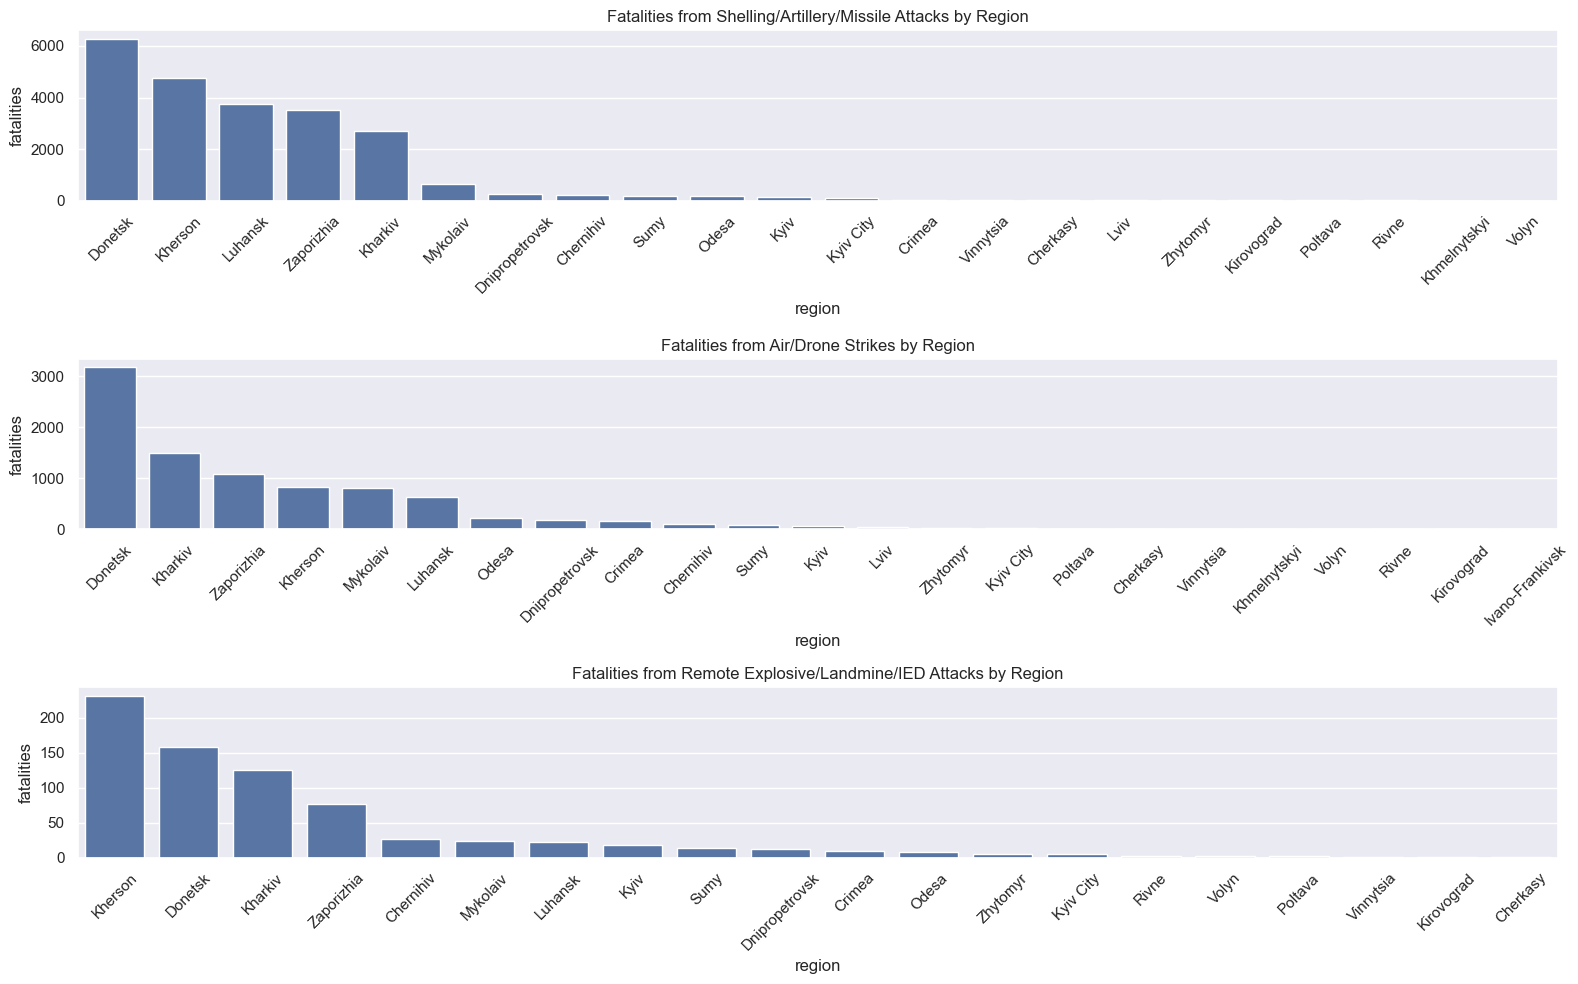

In [5]:
# Фільтруємо дані за певними видами подій
shelling_data = df[df['sub_event_type'] == 'Shelling/artillery/missile attack']
air_strike_data = df[df['sub_event_type'] == 'Air/drone strike']
explosive_data = df[df['sub_event_type'] == 'Remote explosive/landmine/IED']

# Групуємо дані за регіоном і підраховуємо загальну кількість смертей для кожного регіону
shelling_fatalities = shelling_data.groupby('region')['fatalities'].sum().reset_index()
air_strike_fatalities = air_strike_data.groupby('region')['fatalities'].sum().reset_index()
explosive_fatalities = explosive_data.groupby('region')['fatalities'].sum().reset_index()

# Фільтруємо регіони з fatalities, які не дорівнюють 0
shelling_fatalities = shelling_fatalities[shelling_fatalities['fatalities'] > 0]
air_strike_fatalities = air_strike_fatalities[air_strike_fatalities['fatalities'] > 0]
explosive_fatalities = explosive_fatalities[explosive_fatalities['fatalities'] > 0]

# Сортуємо дані за кількістю смертей у спадаючому порядку
shelling_fatalities = shelling_fatalities.sort_values(by='fatalities', ascending=False)
air_strike_fatalities = air_strike_fatalities.sort_values(by='fatalities', ascending=False)
explosive_fatalities = explosive_fatalities.sort_values(by='fatalities', ascending=False)

# Побудова графіків
plt.figure(figsize=(16, 10))
plt.subplot(3, 1, 1)
sns.barplot(x='region', y='fatalities', data=shelling_fatalities)
plt.title('Fatalities from Shelling/Artillery/Missile Attacks by Region')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.barplot(x='region', y='fatalities', data=air_strike_fatalities)
plt.title('Fatalities from Air/Drone Strikes by Region')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.barplot(x='region', y='fatalities', data=explosive_fatalities)
plt.title('Fatalities from Remote Explosive/Landmine/IED Attacks by Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



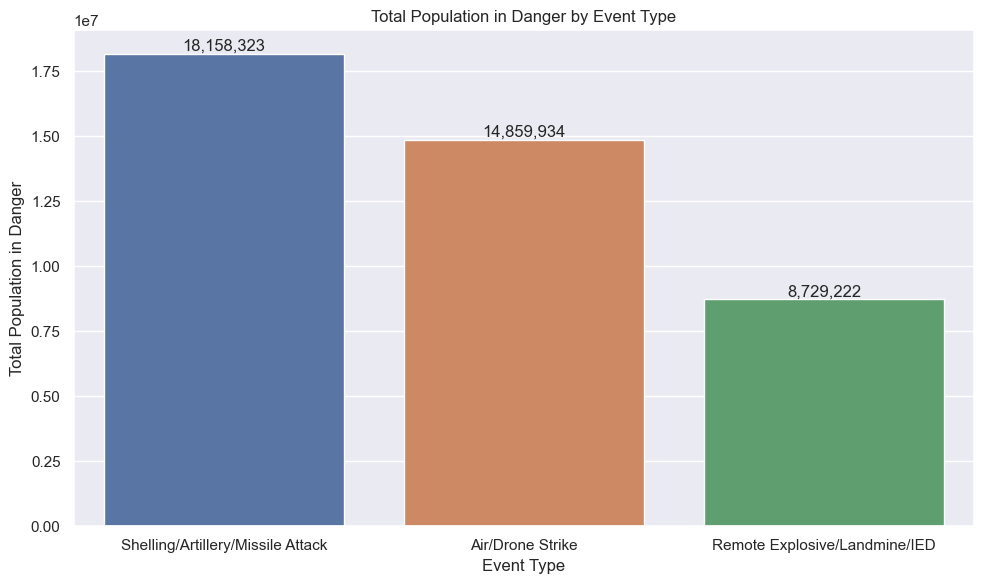

In [6]:

# Видаляємо дублікати для кожного типу подій
shelling_data_unique = shelling_data.drop_duplicates(subset=['location'])
air_strike_data_unique = air_strike_data.drop_duplicates(subset=['location'])
explosive_data_unique = explosive_data.drop_duplicates(subset=['location'])

# Обчислюємо сумарну кількість населення для кожного типу подій
shelling_population_sum = shelling_data_unique['population'].sum()
air_strike_population_sum = air_strike_data_unique['population'].sum()
explosive_population_sum = explosive_data_unique['population'].sum()

# Створюємо датафрейм для зручності побудови графіку
summary_data = pd.DataFrame({
    'Event Type': ['Shelling/Artillery/Missile Attack', 'Air/Drone Strike', 'Remote Explosive/Landmine/IED'],
    'Population in Danger': [shelling_population_sum, air_strike_population_sum, explosive_population_sum]
})

# Побудова барчатого графіку
plt.figure(figsize=(10, 6))
sns.barplot(x='Event Type', y='Population in Danger', data=summary_data, hue='Event Type', dodge=False, legend=False)

# Додавання текстових міток над кожним стовпчиком
for index, row in summary_data.iterrows():
    plt.text(index, row['Population in Danger'], f"{int(row['Population in Danger']):,}", ha='center', va='bottom')

plt.title('Total Population in Danger by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Total Population in Danger')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()



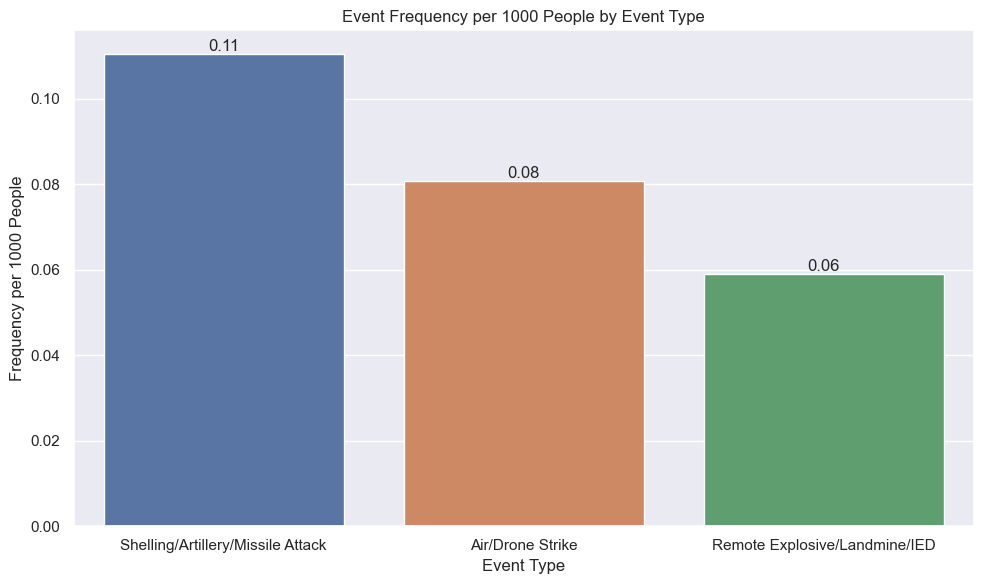

In [7]:
# Обчислюємо частоту подій на 1000 осіб
shelling_frequency_per_1000 = len(shelling_data_unique) / (shelling_population_sum / 1000)
air_strike_frequency_per_1000 = len(air_strike_data_unique) / (air_strike_population_sum / 1000)
explosive_frequency_per_1000 = len(explosive_data_unique) / (explosive_population_sum / 1000)

# Створюємо датафрейм для зручності побудови графіку
frequency_data = pd.DataFrame({
    'Event Type': ['Shelling/Artillery/Missile Attack', 'Air/Drone Strike', 'Remote Explosive/Landmine/IED'],
    'Frequency per 1000 People': [shelling_frequency_per_1000, air_strike_frequency_per_1000, explosive_frequency_per_1000]
})

# Побудова барчатого графіку
plt.figure(figsize=(10, 6))
sns.barplot(x='Event Type', y='Frequency per 1000 People', data=frequency_data, hue='Event Type', dodge=False)

# Додавання текстових міток над кожним стовпчиком
for index, row in frequency_data.iterrows():
    plt.text(index, row['Frequency per 1000 People'], f"{row['Frequency per 1000 People']:.2f}", ha='center', va='bottom')

plt.title('Event Frequency per 1000 People by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Frequency per 1000 People')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


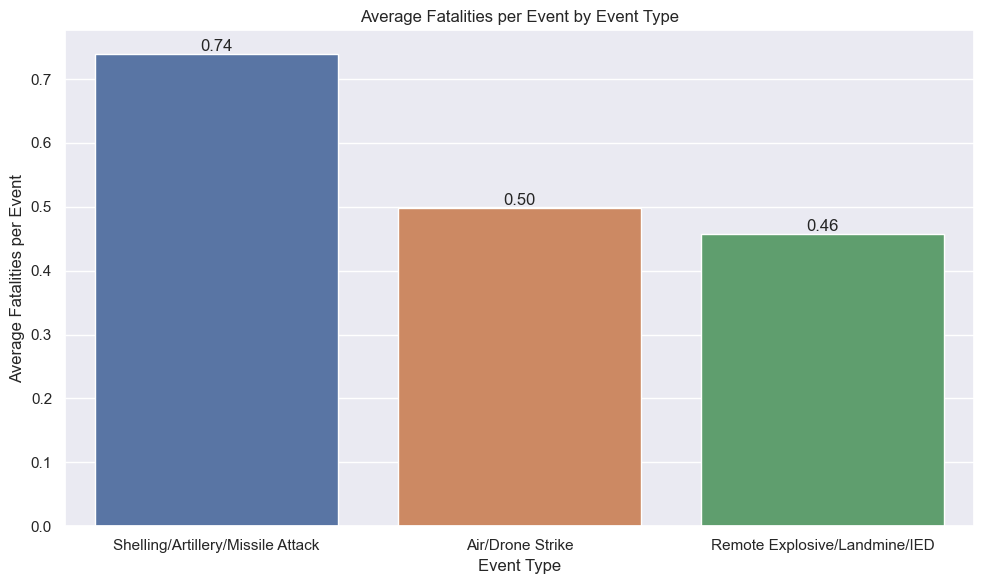

In [8]:
# Обчислюємо середню кількість смертей на подію
shelling_avg_fatalities = shelling_data_unique['fatalities'].mean()
air_strike_avg_fatalities = air_strike_data_unique['fatalities'].mean()
explosive_avg_fatalities = explosive_data_unique['fatalities'].mean()

# Створюємо датафрейм для зручності побудови графіку
fatalities_data = pd.DataFrame({
    'Event Type': ['Shelling/Artillery/Missile Attack', 'Air/Drone Strike', 'Remote Explosive/Landmine/IED'],
    'Average Fatalities per Event': [shelling_avg_fatalities, air_strike_avg_fatalities, explosive_avg_fatalities]
})

# Побудова барчатого графіку
plt.figure(figsize=(10, 6))
sns.barplot(x='Event Type', y='Average Fatalities per Event', data=fatalities_data, hue='Event Type', dodge=False)

# Додавання текстових міток над кожним стовпчиком
for index, row in fatalities_data.iterrows():
    plt.text(index, row['Average Fatalities per Event'], f"{row['Average Fatalities per Event']:.2f}", ha='center', va='bottom')

plt.title('Average Fatalities per Event by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Fatalities per Event')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


Total days: 778
Shelling events per day: 2.5784
Air strike events per day: 1.5437
Explosive events per day: 0.6632


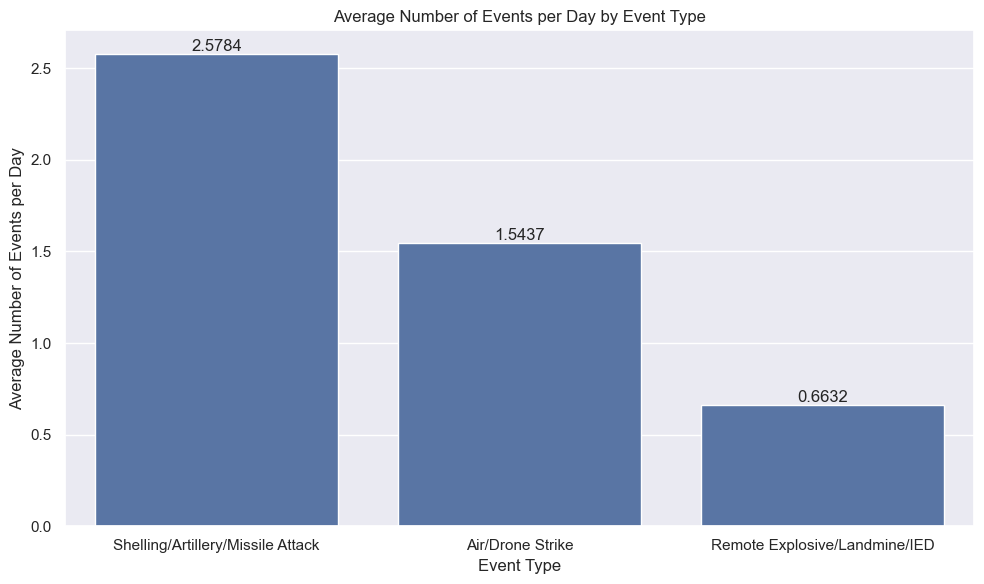

In [9]:
# Перетворення 'event_date' у формат дати
df['event_date'] = pd.to_datetime(df['event_date'])


#Визначаємо загальну кількість днів у періоді
total_days = (df['event_date'].max() - df['event_date'].min()).days

# Обчислення середньої кількості подій на день
shelling_events_per_day = len(shelling_data_unique) / total_days
air_strike_events_per_day = len(air_strike_data_unique) / total_days
explosive_events_per_day = len(explosive_data_unique) / total_days

# Перевірка результатів
print(f"Total days: {total_days}")
print(f"Shelling events per day: {shelling_events_per_day:.4f}")
print(f"Air strike events per day: {air_strike_events_per_day:.4f}")
print(f"Explosive events per day: {explosive_events_per_day:.4f}")

# Створення DataFrame з середніми значеннями подій на день
events_per_day_data = pd.DataFrame({
    'Event Type': ['Shelling/Artillery/Missile Attack', 'Air/Drone Strike', 'Remote Explosive/Landmine/IED'],
    'Events per Day': [shelling_events_per_day, air_strike_events_per_day, explosive_events_per_day]
})

# Побудова графіку
plt.figure(figsize=(10, 6))
sns.barplot(x='Event Type', y='Events per Day', data=events_per_day_data, dodge=False)

# Додавання текстових міток
for index, row in events_per_day_data.iterrows():
    plt.text(index, row['Events per Day'], f"{row['Events per Day']:.4f}", ha='center', va='bottom')

plt.title('Average Number of Events per Day by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Number of Events per Day')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()



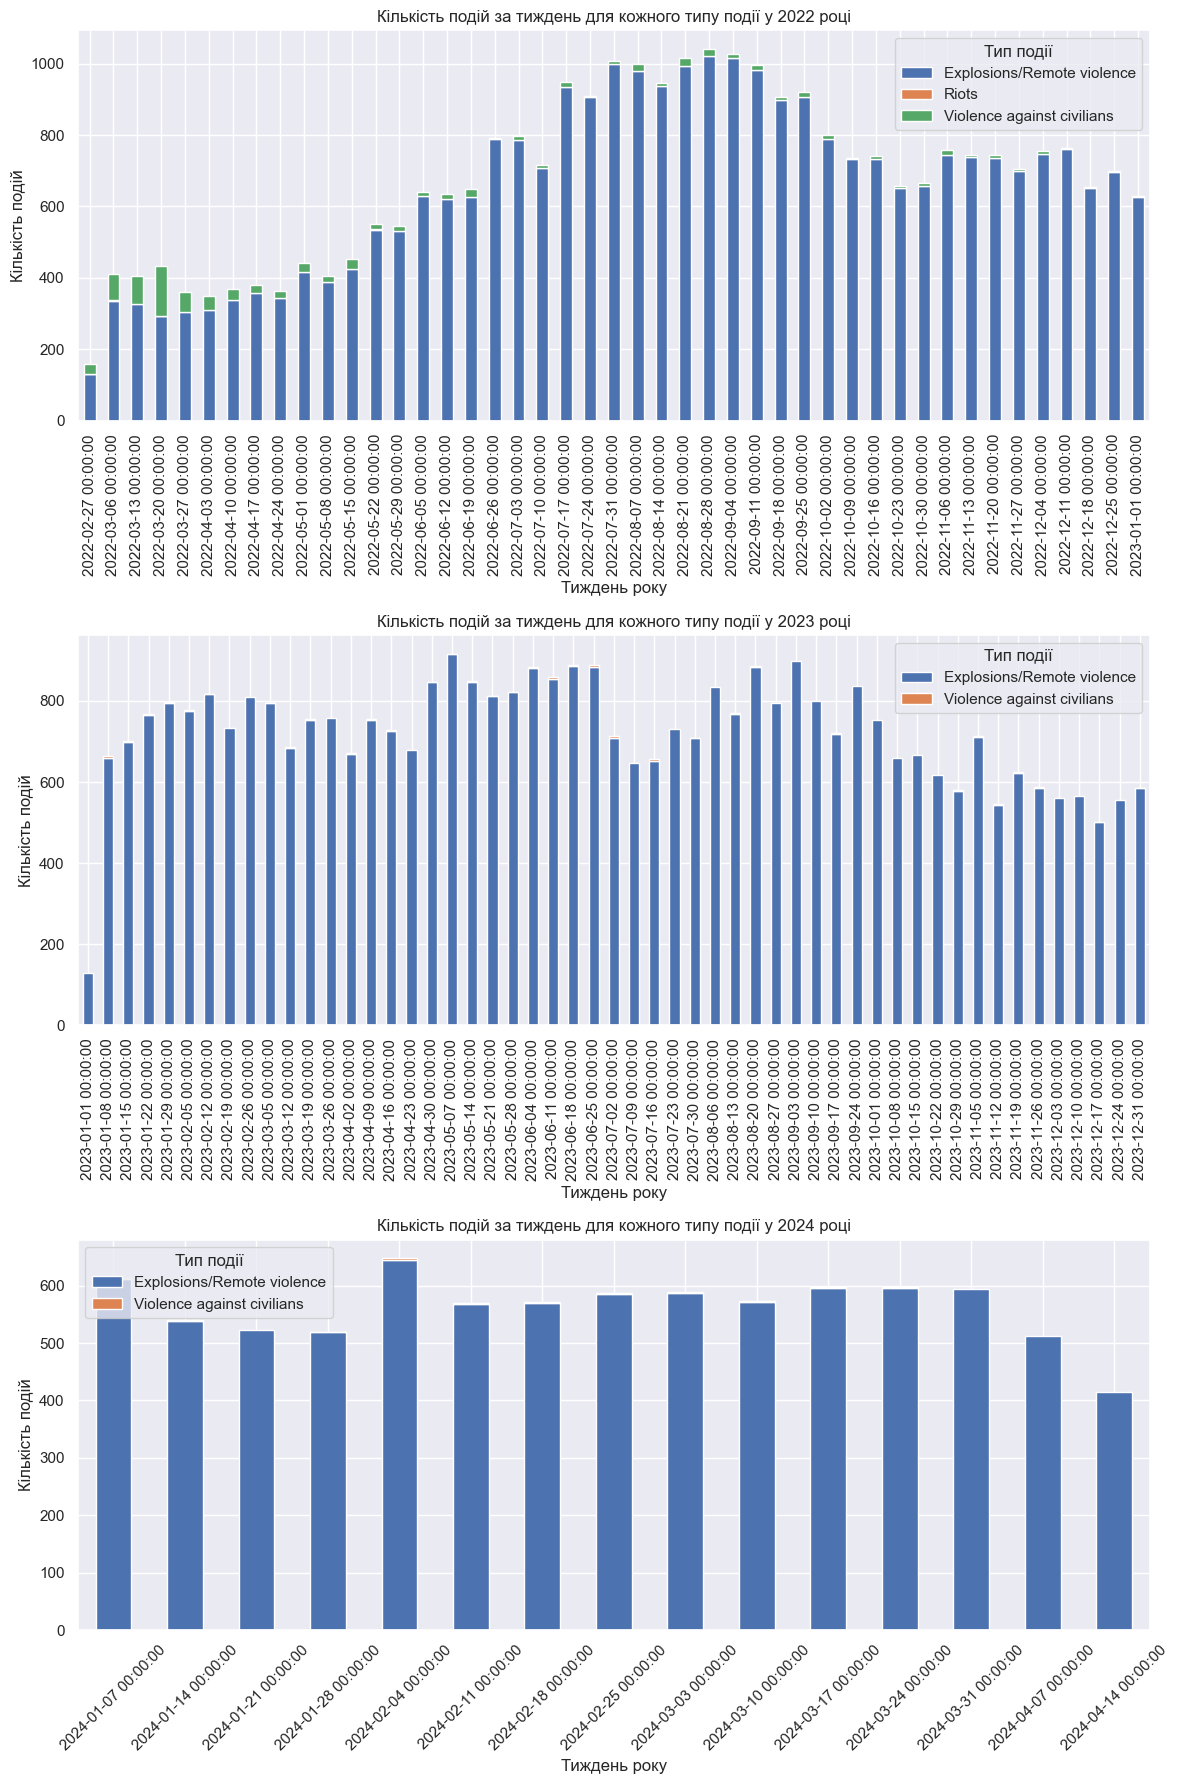

In [10]:
data=df.copy()

# Перетворення колонки event_date в формат дати
data['event_date'] = pd.to_datetime(data['event_date'])

# Витягуємо рік з колонки event_date
data['year'] = data['event_date'].dt.year

# Вибираємо дані за 2022, 2023, 2024 роки
data_2022 = data[data['year'] == 2022]
data_2023 = data[data['year'] == 2023]
data_2024 = data[data['year'] == 2024]

# Створення трипідграфіка
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=False)

# Побудова графіків для кожного року
for ax, data_year, year in zip(axs, [data_2022, data_2023, data_2024], [2022, 2023, 2024]):
    # Групування за event_type та створення тижневого ряду
    weekly_events = data_year.groupby([pd.Grouper(key='event_date', freq='W'), 'event_type']).size().unstack(fill_value=0)
    
    # Побудова графіків для кожного типу подій
    weekly_events.plot(kind='bar', stacked=True, ax=ax)
    
    # Налаштування вигляду графіку
    ax.set_ylabel('Кількість подій')
    ax.set_title(f'Кількість подій за тиждень для кожного типу події у {year} році')
    ax.set_xlabel('Тиждень року')
    ax.legend(title='Тип події')

    # Показ графіка
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

